In [1]:
#import statements

#data frames
import pandas as pd
import numpy as np

#graphics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#machine learning
#for sklearn

In [2]:
#format pandas for reading
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', -1)

In [3]:
#read data

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
feature_desc = pd.read_csv("feature_descriptions.csv")

train_labels = pd.read_csv("train_labels.csv")

In [4]:
#concate train_labels to train
train = pd.merge(train,
                 train_labels,
                 on = 'id')

In [5]:
#label data as test/train
train['dataType'] = 'train'
test['dataType'] = 'test'

In [6]:
trainTest = pd.concat([train,test])

In [7]:
train.shape

(59400, 42)

In [8]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,dataType
0,69572,6000.0,3/14/11,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,train
1,8776,0.0,3/6/13,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,train
2,34310,25.0,2/25/13,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,train
3,67743,0.0,1/28/13,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,train
4,19728,0.0,7/13/11,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,train


In [9]:
train.isnull().sum()

id                       0    
amount_tsh               0    
date_recorded            0    
funder                   3635 
gps_height               0    
installer                3655 
longitude                0    
latitude                 0    
wpt_name                 0    
num_private              0    
basin                    0    
subvillage               371  
region                   0    
region_code              0    
district_code            0    
lga                      0    
ward                     0    
population               0    
public_meeting           3334 
recorded_by              0    
scheme_management        3877 
scheme_name              28166
permit                   3056 
construction_year        0    
extraction_type          0    
extraction_type_group    0    
extraction_type_class    0    
management               0    
management_group         0    
payment                  0    
payment_type             0    
water_quality            0    
quality_

In [10]:
threshold5per = len(train)*.05

In [11]:
columns2Drop = train.columns[train.isnull().sum()>threshold5per]

In [13]:
#drop from train, test, and master
train.drop(labels = columns2Drop, inplace=True, axis =1)
test.drop(labels = columns2Drop, inplace=True, axis =1)
trainTest.drop(labels = columns2Drop, inplace=True, axis =1)

In [14]:
#drop id from train, test, and master
train.drop(labels = 'id', inplace=True, axis =1)
test.drop(labels = 'id', inplace=True, axis =1)
trainTest.drop(labels = 'id', inplace=True, axis =1)

In [15]:
train.isnull().sum()
#subvillage is now the only thing missing data

amount_tsh               0  
date_recorded            0  
gps_height               0  
longitude                0  
latitude                 0  
wpt_name                 0  
num_private              0  
basin                    0  
subvillage               371
region                   0  
region_code              0  
district_code            0  
lga                      0  
ward                     0  
population               0  
recorded_by              0  
construction_year        0  
extraction_type          0  
extraction_type_group    0  
extraction_type_class    0  
management               0  
management_group         0  
payment                  0  
payment_type             0  
water_quality            0  
quality_group            0  
quantity                 0  
quantity_group           0  
source                   0  
source_type              0  
source_class             0  
waterpoint_type          0  
waterpoint_type_group    0  
status_group             0  
dataType      

In [16]:
cat_col = list(train.select_dtypes(include = ['object']).columns)
num_col = list(train.select_dtypes(exclude = ['object']).columns)

In [17]:
print(cat_col)

['date_recorded', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'recorded_by', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group', 'dataType']


In [18]:
print(train[cat_col].nunique())
print()
print(train[cat_col].nunique()>21)

#convert date_recorded into an actual date
#drop anything with more than 21 different categories
#drop recorded_by as only has 1 unique value

date_recorded            356  
wpt_name                 37400
basin                    9    
subvillage               19287
region                   21   
lga                      125  
ward                     2092 
recorded_by              1    
extraction_type          18   
extraction_type_group    13   
extraction_type_class    7    
management               12   
management_group         5    
payment                  7    
payment_type             7    
water_quality            8    
quality_group            6    
quantity                 5    
quantity_group           5    
source                   10   
source_type              7    
source_class             3    
waterpoint_type          7    
waterpoint_type_group    6    
status_group             3    
dataType                 1    
dtype: int64

date_recorded            True 
wpt_name                 True 
basin                    False
subvillage               True 
region                   False
lga                      

In [19]:
columns2drop2 = ['wpt_name','subvillage','lga','ward','recorded_by']

In [21]:
#dropping additional features
train.drop(columns2drop2, inplace=True, axis =1)
test.drop(columns2drop2, inplace=True, axis =1)
trainTest.drop(columns2drop2, inplace=True, axis =1)

In [26]:
cat_col = list(train.select_dtypes(include = ['object']).columns)
num_col = list(train.select_dtypes(exclude = ['object']).columns)

In [47]:
#does this work?
pd.to_datetime(train['date_recorded'])
pd.to_datetime(test['date_recorded'])
pd.to_datetime(trainTest['date_recorded'])

0       2011-03-14
1       2013-03-06
2       2013-02-25
3       2013-01-28
4       2011-07-13
5       2011-03-13
6       2012-10-01
7       2012-10-09
8       2012-11-03
9       2011-08-03
10      2011-02-20
11      2013-02-18
12      2012-10-14
13      2013-03-15
14      2012-10-20
15      2011-08-04
16      2011-07-04
17      2011-09-04
18      2011-07-22
19      2011-02-22
20      2011-02-27
21      2013-02-10
22      2011-10-04
23      2013-11-03
24      2013-01-21
25      2013-02-25
26      2013-01-16
27      2011-07-11
28      2013-03-05
29      2013-03-16
           ...    
14820   2013-01-27
14821   2013-03-29
14822   2013-01-22
14823   2011-04-03
14824   2011-04-20
14825   2013-02-02
14826   2012-10-24
14827   2011-07-23
14828   2011-02-20
14829   2013-01-03
14830   2013-03-19
14831   2012-10-26
14832   2013-03-25
14833   2011-03-05
14834   2011-03-27
14835   2013-01-25
14836   2011-03-18
14837   2013-02-10
14838   2011-03-11
14839   2011-03-11
14840   2013-02-24
14841   2012

In [51]:
train[cat_col].columns

Index(['date_recorded', 'basin', 'region', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group', 'dataType'],
      dtype='object')

In [50]:
train.status_group.value_counts(normalize = True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

Need to look at a differnet feature groups to see if they are the same or if they have any differences

extraction_type, extraction_type_group, extraction_type_group
management, management_group
payment, payment_type
water_quality, quality_group
quantity, quantity_group
source, source_type, source_group
waterpoint_type, waterpoint_group

In [84]:
test = trainTest[cat_col].copy()

In [91]:
for f in test['extraction_type_class']:
    test[f]=test[f].factorize()



#test['extraction_type']
#test['extraction_type'].factorize()
#test['extraction_type_group'] = test['extraction_type_group'].factorize()
#test['extraction_type_class'] = test['extraction_type_class'].factorize()

KeyError: 'gravity'

In [104]:
labels, uniques = test.water_quality.factorize()
labels1, uniques1 = test.quality_group.factorize()

In [105]:
print(labels)
print(uniques)
print()
print(labels1)
print(uniques1)

[0 0 0 ..., 0 0 0]
Index(['soft', 'salty', 'milky', 'unknown', 'fluoride', 'coloured',
       'salty abandoned', 'fluoride abandoned'],
      dtype='object')

[0 0 0 ..., 0 0 0]
Index(['good', 'salty', 'milky', 'unknown', 'fluoride', 'colored'], dtype='object')


In [82]:
test['extraction_type']

0        gravity      
1        gravity      
2        gravity      
3        submersible  
4        gravity      
5        submersible  
6        swn 80       
7        nira/tanira  
8        india mark ii
9        nira/tanira  
10       submersible  
11       swn 80       
12       nira/tanira  
13       gravity      
14       nira/tanira  
15       swn 80       
16       gravity      
17       gravity      
18       other        
19       gravity      
20       gravity      
21       swn 80       
22       gravity      
23       gravity      
24       gravity      
25       gravity      
26       india mark ii
27       nira/tanira  
28       gravity      
29       gravity      
          ...         
14820    gravity      
14821    gravity      
14822    gravity      
14823    gravity      
14824    swn 80       
14825    india mark ii
14826    nira/tanira  
14827    nira/tanira  
14828    other        
14829    gravity      
14830    gravity      
14831    nira/tanira  
14832    su

In [72]:
test.head()

,date_recorded,basin,region,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,dataType
0,3/14/11,Lake Nyasa,Iringa,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,train
1,3/6/13,Lake Victoria,Mara,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,train
2,2/25/13,Pangani,Manyara,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,train
3,1/28/13,Ruvuma / Southern Coast,Mtwara,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,train
4,7/13/11,Lake Victoria,Kagera,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,train


In [ ]:
train.groupby('basin').status_group.value_counts(
    normalize = True).unstack().sort_values('functional',ascending=False)

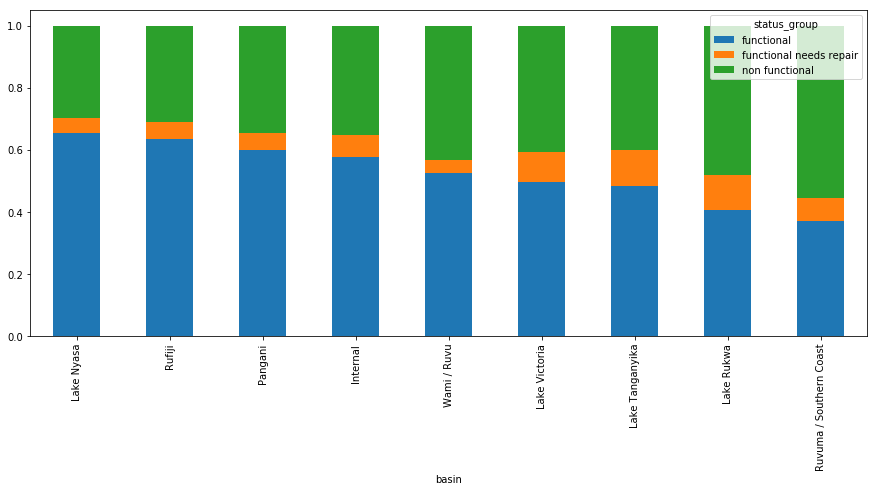

In [52]:
plt.rcParams['figure.figsize']=(15,6)

train.groupby('basin').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

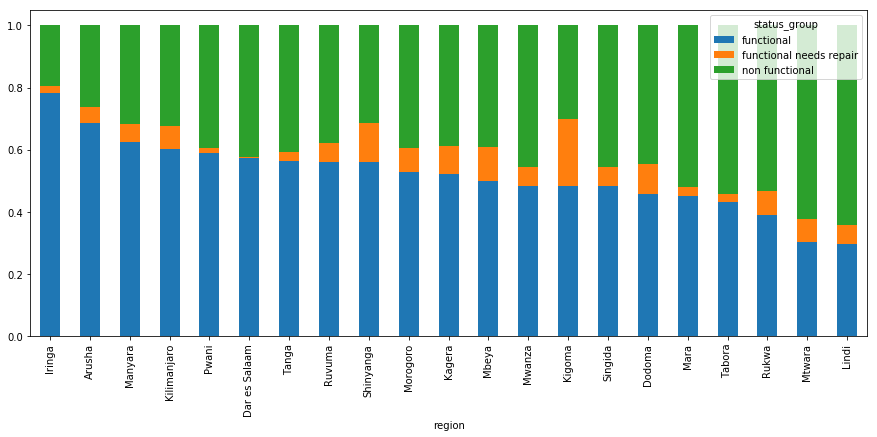

In [53]:
plt.rcParams['figure.figsize']=(15,6)

train.groupby('region').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

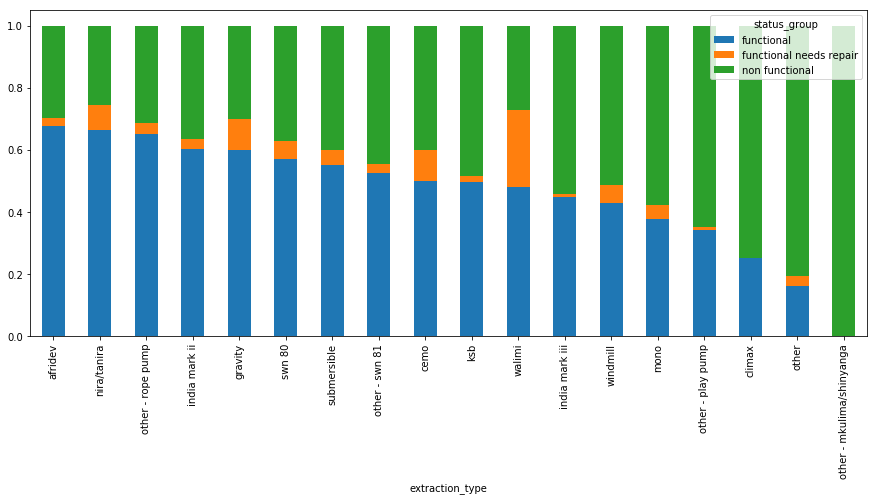

In [54]:
train.groupby('extraction_type').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

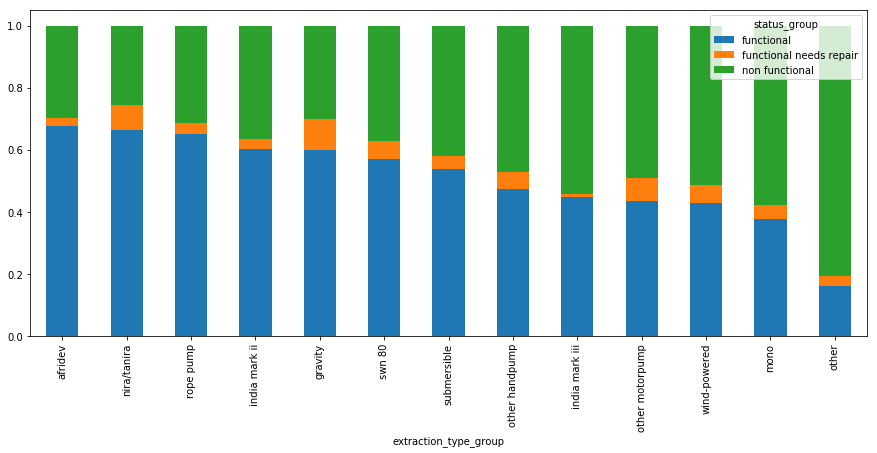

In [55]:
train.groupby('extraction_type_group').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

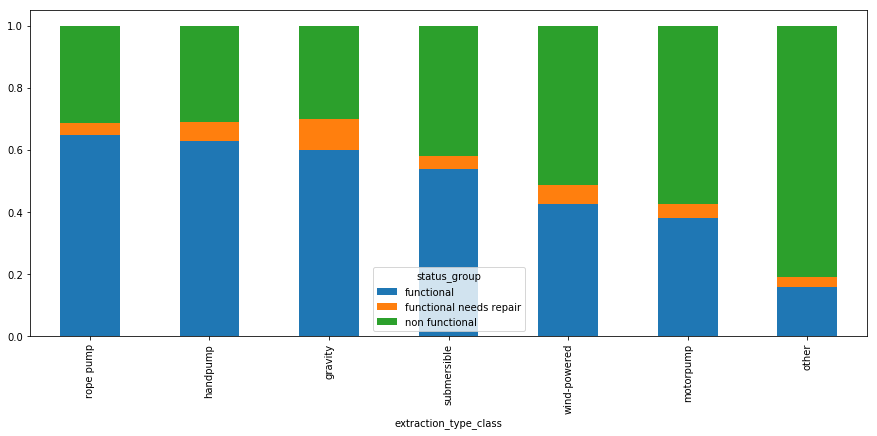

In [57]:
#Extraction_type_class

#The biggest broadest type of extraction class
#both extraction type/group are smaller

train.groupby('extraction_type_class').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

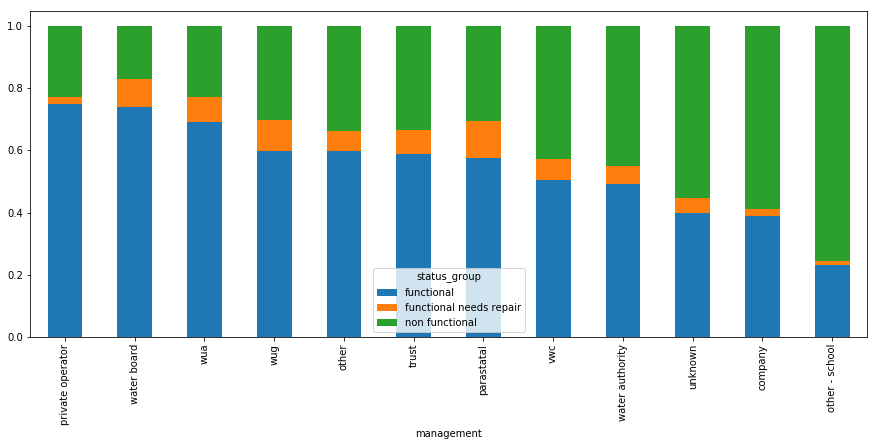

In [58]:
#Managment
train.groupby('management').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

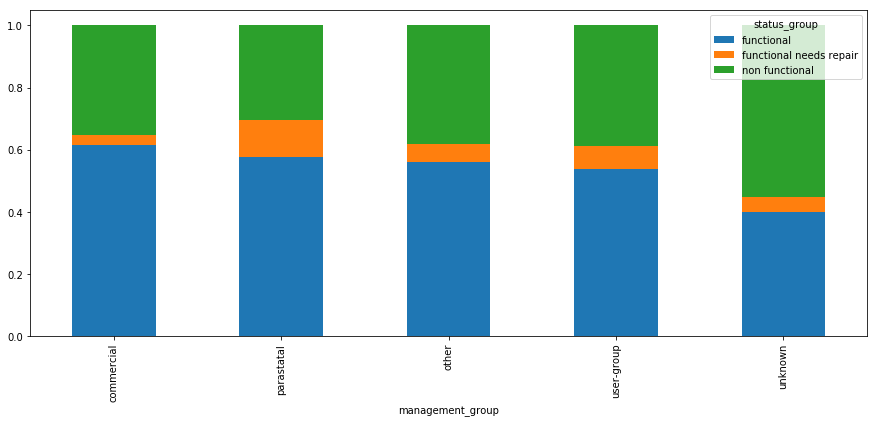

In [59]:
#managment_group
train.groupby('management_group').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

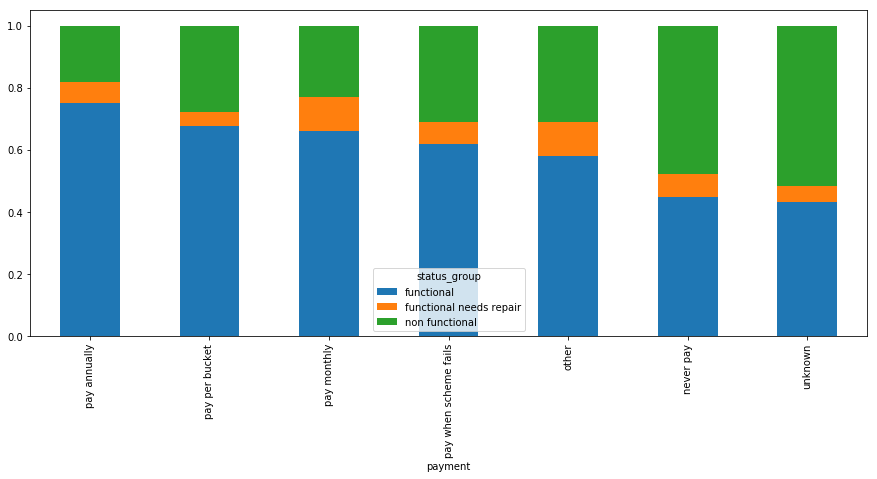

In [60]:
#payment
train.groupby('payment').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

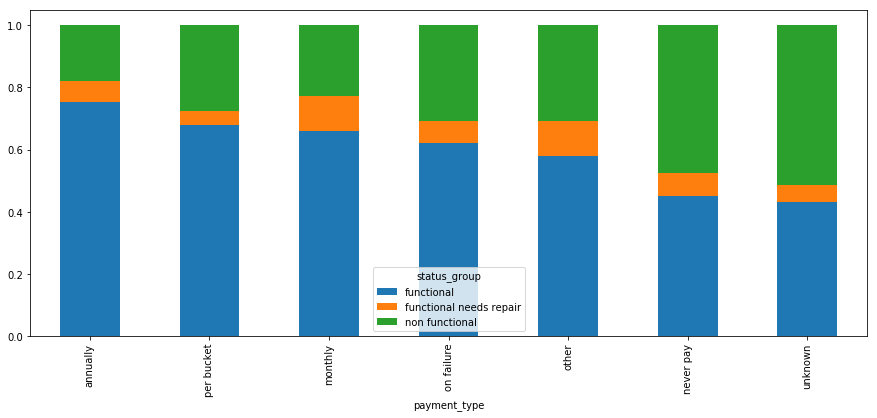

In [61]:
#payment_type
train.groupby('payment_type').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)

In [56]:
feature_desc

,Feature,Description
0,amount_tsh,Total static head (amount water available to waterpoint)
1,date_recorded,The date the row was entered
2,funder,Who funded the well
3,gps_height,Altitude of the well
4,installer,Organization that installed the well
5,longitude,GPS coordinate
6,latitude,GPS coordinate
7,wpt_name,Name of the waterpoint if there is one
8,num_private,(blank)
9,basin,Geographic water basin


In [62]:
train[['payment','payment_type']]

,payment,payment_type
0,pay annually,annually
1,never pay,never pay
2,pay per bucket,per bucket
3,never pay,never pay
4,never pay,never pay
5,pay per bucket,per bucket
6,never pay,never pay
7,unknown,unknown
8,never pay,never pay
9,never pay,never pay


In [65]:
train[['source','source_type','source_class']]

,source,source_type,source_class
0,spring,spring,groundwater
1,rainwater harvesting,rainwater harvesting,surface
2,dam,dam,surface
3,machine dbh,borehole,groundwater
4,rainwater harvesting,rainwater harvesting,surface
5,other,other,unknown
6,machine dbh,borehole,groundwater
7,shallow well,shallow well,groundwater
8,machine dbh,borehole,groundwater
9,shallow well,shallow well,groundwater


In [ ]:
train.groupby('subvillage').status_group.value_counts(
    normalize = True).unstack().sort_values(['functional'],ascending=False).plot(
    kind='bar',stacked = True)